In [5]:
%matplotlib notebook

import os
import sys
import cv2
import matplotlib.pyplot as plt
from darkflow.net.build import TFNet

In [6]:
# directory with images from video
working_directory = '/home/analyticsuser/data/Nest Cam - Owner catches burglars in act on her phone'

# only images
files_in_directory = sorted([os.path.join(working_directory, file_name)
                      for file_name in os.listdir(working_directory)
                      if os.path.splitext(file_name)[1].lower() in ('.jpg', '.jpeg')])

# colors for different bboxes for visualization
colors = [(255,0,0), (0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255),(192,192,192),(128,128,128),
          (128,0,0),(128,128,0),(0,128,0),(128,0,128),(0,128,128),(0,0,128),(0,0,0)]

# configuration for YOLO
options = {'model': '/home/analyticsuser/darkflow/cfg/yolo-voc.2.0.cfg', 
           'load': '/home/analyticsuser/darkflow/cfg/yolo-voc.2.0.weights', 'threshold': 0.1}

tfnet = TFNet(options)


Parsing ./cfg/yolo-voc.2.0.cfg
Parsing /home/analyticsuser/darkflow/cfg/yolo-voc.2.0.cfg
Loading /home/analyticsuser/darkflow/cfg/yolo-voc.2.0.weights ...
Successfully identified 268632452 bytes
Finished in 0.047144412994384766s


<IPython.core.display.Javascript object>


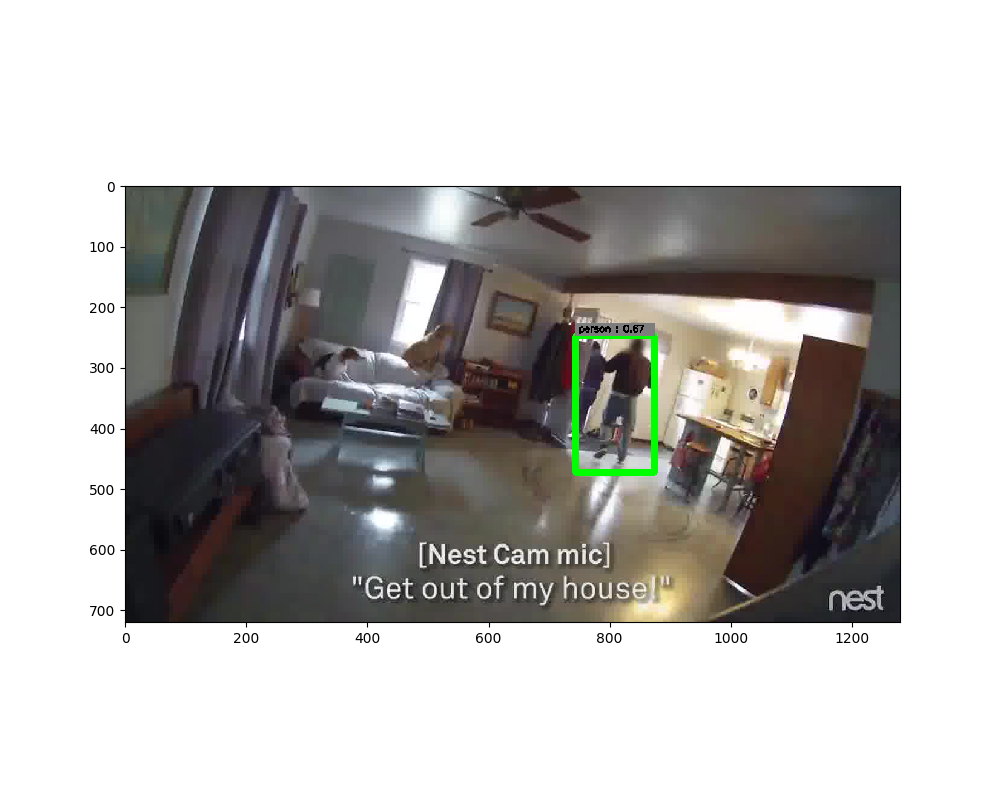

/home/analyticsuser/Nest Cam - Owner catches burglars in act on her phone/output_00001.jpg

/home/analyticsuser/anaconda3/envs/jupyter/lib/python3.6/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


/home/analyticsuser/Nest Cam - Owner catches burglars in act on her phone/output_02001.jpg

In [7]:
plt.ion()

# init matplotlib displaying
imgcv = cv2.imread(files_in_directory[0])
imgcv_to_display = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
detections_preview = plt.imshow(imgcv_to_display)
try:
    plt.pause(0.05)
except Exception:
    pass

# displaying all
for file_name in files_in_directory[::10]:
    sys.stdout.write("\r" + file_name)
    sys.stdout.flush()
    imgcv = cv2.imread(file_name)
    result = tfnet.return_predict(imgcv)
    for idx, detection in enumerate(result):
        if detection['label'] == 'person' or detection['label'] == 'dog' or detection['label'] == 'cat':
            cv2.rectangle(imgcv, (detection['topleft']['x'], detection['topleft']['y']), 
                          (detection['bottomright']['x'], detection['bottomright']['y']), 
                          colors[idx % len(colors)], 10)

            cv2.rectangle(imgcv, (detection['topleft']['x'], detection['topleft']['y'] - 20), 
                          (detection['bottomright']['x'], detection['topleft']['y']), (125, 125, 125), -1)

            cv2.putText(imgcv, detection['label'] + ' : %.2f' % detection['confidence'], 
                        (detection['topleft']['x'] + 5, detection['topleft']['y'] - 7), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            
        imgcv_to_display = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)
        
        detections_preview.set_data(imgcv_to_display)
        plt.draw()
        try:
            plt.pause(0.05)
        except Exception:
            pass